In [1]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# 1. 读取MNIST数据
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 特征缩放
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. 构建支持向量机模型
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# 5. 模型评估
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9833333333333333
Precision: 0.9829848627466402
Recall: 0.9829219696637906
F1 Score: 0.9828869688129751


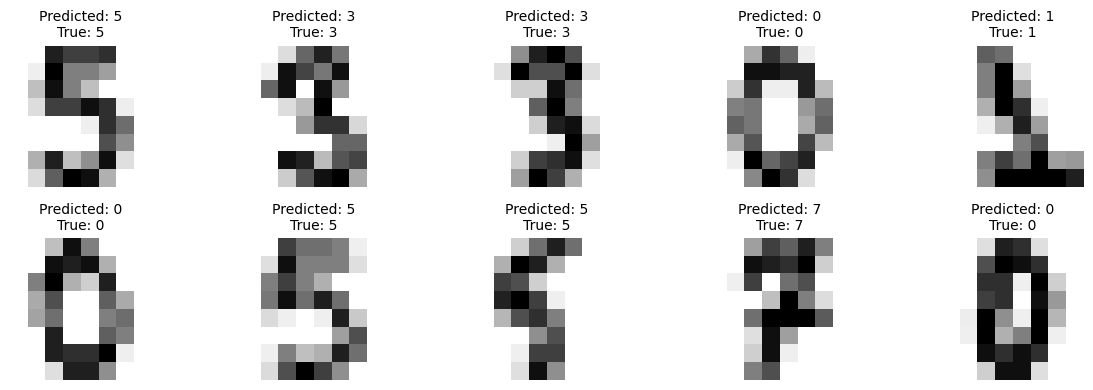

In [4]:
# 可视化操作
# 显示一些测试集样本及其预测结果
import matplotlib.pyplot as plt
import seaborn as sns
n_samples = 10
sample_indices = np.random.choice(X_test.shape[0], n_samples, replace=False)
samples = X_test[sample_indices]
predictions = y_pred[sample_indices]
ground_truth = y_test[sample_indices]

plt.figure(figsize=(12, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples // 2, i + 1)
    plt.imshow(samples[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Predicted: {predictions[i]}\nTrue: {ground_truth[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()